  VARNAMES:  CID      ZCMB    DLMAG  PEAKMAG_g
0       SN:   33  0.361711  41.4199    22.1367
1       SN:   76  0.175569  39.6386    19.8352
2       SN:   79  0.199164  39.9427    21.5777
3       SN:   90  0.315914  41.0795    22.2834
4       SN:  115  0.421240  41.8085    23.2361


/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_38420/498892141.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("myc21_p2_pb.DUMP", comment="#", delim_whitespace=True)


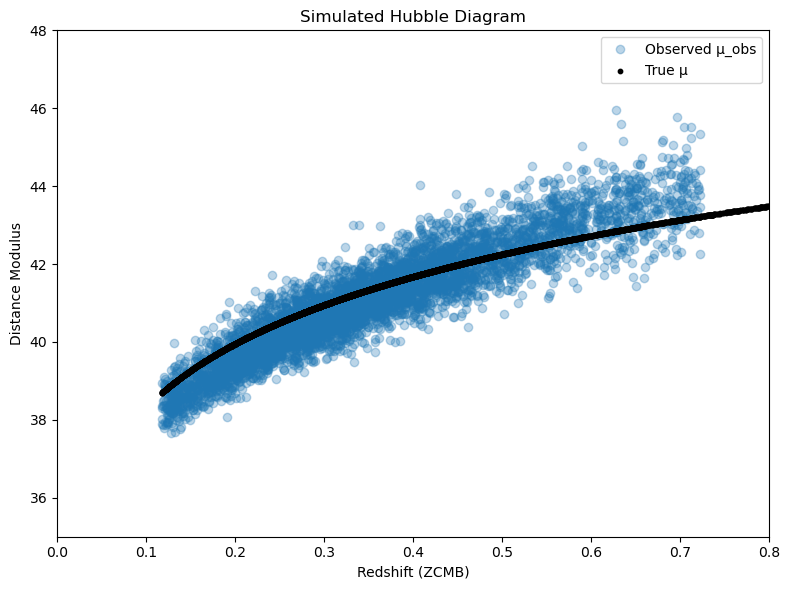

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

M_avg = -18.6  # Average absolute magnitude of SNe Ia

# Load while skipping commented lines and parsing manually
data = pd.read_csv("myc21_p2_pb.DUMP", comment="#", delim_whitespace=True)

# Show the first few rows nicely
print(data.head())

plt.figure(figsize=(8,6))
plt.plot(data["ZCMB"], data["PEAKMAG_g"] + abs(M_avg), 'o', markersize=6, alpha=0.3, label="Observed μ_obs", zorder=1)
plt.scatter(data["ZCMB"], data["DLMAG"], s=10, label="True μ", color='black', zorder=2)

plt.xlabel("Redshift (ZCMB)")
plt.ylabel("Distance Modulus")
plt.title("Simulated Hubble Diagram")
plt.xlim(0, 0.8)
plt.ylim(35, 48)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_4405/1645590811.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("myc21_p2_pb.DUMP", comment="#", delim_whitespace=True)
/Users/pittsburghgraduatestudent/miniforge3/envs/ds2/lib/python3.11/site-packages/astropy/cosmology/flrw/base.py:1471: RuntimeWarning: divide by zero encountered in log10
  val = 5.0 * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


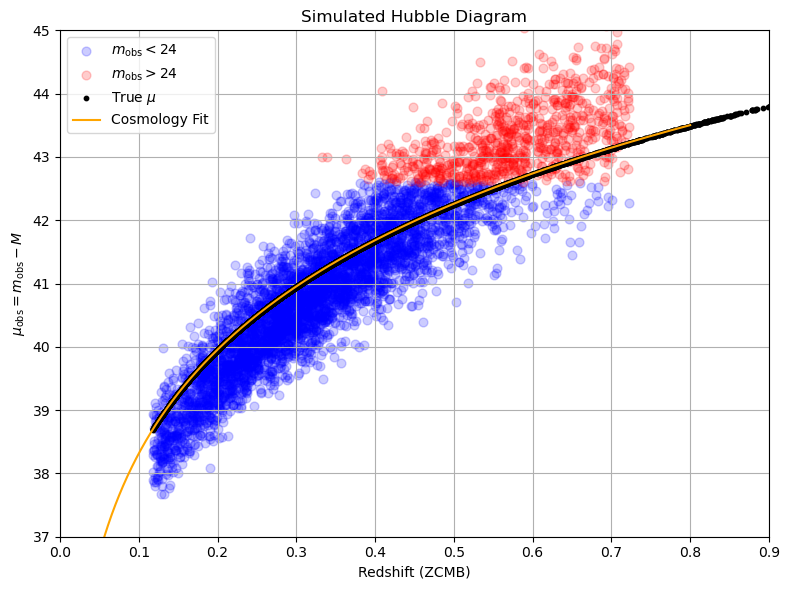

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

M_avg = -18.6  # Average absolute magnitude of SNe Ia

# Load SNANA DUMP file, skipping commented lines
data = pd.read_csv("myc21_p2_pb.DUMP", comment="#", delim_whitespace=True)

# Define brightness cuts
bright = data["PEAKMAG_g"] < 24  # detected
faint = data["PEAKMAG_g"] >= 24  # missed

# Start plotting
plt.figure(figsize=(8,6))

# Bright (detected) SNe in blue
plt.scatter(data["ZCMB"][bright],
            data["PEAKMAG_g"][bright] + abs(M_avg),
            color='blue', s=40, alpha=0.2,  # Increased size by 4 times (s=10 -> s=40)
            label=r"$m_{\mathrm{obs}} < 24$")

# Faint (undetected) SNe in red
plt.scatter(data["ZCMB"][faint],
            data["PEAKMAG_g"][faint] + abs(M_avg),
            color='red', s=40, alpha=0.2,  # Increased size by 4 times (s=10 -> s=40)
            label=r"$m_{\mathrm{obs}} > 24$")

# True μ line
plt.scatter(data["ZCMB"], data["DLMAG"],
            s=10, color='black', label=r"True $\mu$", zorder=2)


# Generate cosmology fit curve
z_model = np.linspace(0, 0.8, 1000)  # Redshift range for the fit curve
mu_fit = cosmo.distmod(z_model).value  # Distance modulus from cosmology model

# Plot the cosmology fit curve
plt.plot(z_model, mu_fit, color='orange', linestyle='-', label="Cosmology Fit")

# Axes and legend
plt.xlabel("Redshift (ZCMB)")
plt.ylabel(r"$\mu_{\mathrm{obs}} = m_{\mathrm{obs}} - M$")
plt.title("Simulated Hubble Diagram")
plt.xlim(0, 0.9)
plt.ylim(37, 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

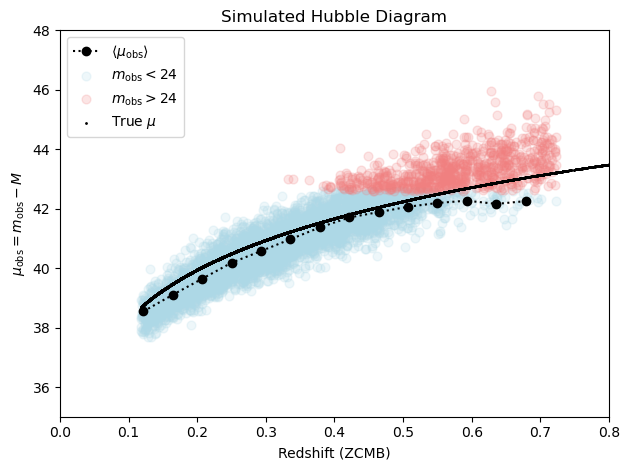

In [11]:
from scipy.stats import binned_statistic

# Bin edges and centers
bins = np.linspace(0.1, 0.7, 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# μ_obs for bright only (mobs < 24)
mu_obs = data["PEAKMAG_g"] + abs(M_avg)
mu_obs_binned, _, _ = binned_statistic(data["ZCMB"][bright],
                                       mu_obs[bright],
                                       statistic='mean',
                                       bins=bins)

# Plot the binned average μ_obs (dotted black line with filled circles)
plt.plot(bin_centers, mu_obs_binned, 'ko:', label=r"$\langle \mu_{\mathrm{obs}} \rangle$")

# Bright (detected) SNe in light blue
plt.scatter(data["ZCMB"][bright],
            data["PEAKMAG_g"][bright] + abs(M_avg),
            color='lightblue', s=40, alpha=0.2,  # Increased size by 4 times (s=10 -> s=40)
            label=r"$m_{\mathrm{obs}} < 24$")

# Faint (undetected) SNe in light red
plt.scatter(data["ZCMB"][faint],
            data["PEAKMAG_g"][faint] + abs(M_avg),
            color='lightcoral', s=40, alpha=0.2,  # Increased size by 4 times (s=10 -> s=40)
            label=r"$m_{\mathrm{obs}} > 24$")

# True μ line
plt.scatter(data["ZCMB"], data["DLMAG"],
            s=1, color='black', label=r"True $\mu$", zorder=2)

# Axes and legend
plt.xlabel("Redshift (ZCMB)")
plt.ylabel(r"$\mu_{\mathrm{obs}} = m_{\mathrm{obs}} - M$")
plt.title("Simulated Hubble Diagram")
plt.xlim(0, 0.8)
plt.ylim(35, 48)
plt.legend()
plt.tight_layout()
plt.show()
